In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import operator
import numpy as np
import json
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
files = ['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'USvideos.csv']
df_fin = list()
for i in files:
    df_init = pd.read_csv(i)
    df_init['country'] = i[:2]
    df_fin.append(df_init)

vids = pd.concat(df_fin)

In [3]:
with open("US_category_id.json", 'r') as f:
    US_cats = json.load(f)
categs = {}
for cats in US_cats['items']:
    categs[cats['id']] = cats['snippet']['title']
for col in ['category_id']:
    vids[col] = vids[col].astype(str)
vids['Category'] = vids['category_id'].map(categs)

In [4]:
vids_US = vids[vids['country'] == 'US']
count = vids_US.groupby('Category').count()
categ_count = count['video_id']
categ_count = categ_count.sort_values(ascending = False)
top_10 = {}
for i in range(10):
    top_10[categ_count.index[i]] = categ_count.values[i]

In [5]:
p = {}
l = 0
for i in top_10:
    trend = vids_US[vids_US['Category'] == list(top_10)[l]]
    trend = trend.drop_duplicates('video_id')
    
    t = trend.groupby('title').count()
    trend['publish_time'] = trend['publish_time'].str[2:10]
    trend['publish_year'] = trend['publish_time'].str[:2]
    trend['publish_month'] = trend['publish_time'].str[3:5]
    trend['publish_day'] = trend['publish_time'].str[6:]
    trend['trending_year'] = trend['trending_date'].str[:2]
    trend['trending_day'] = trend['trending_date'].str[3:5]
    trend['trending_month'] = trend['trending_date'].str[6:]

    year = (pd.to_numeric(trend['trending_year']) - pd.to_numeric(trend['publish_year'])) * 365
    month = (pd.to_numeric(trend['trending_month']) - pd.to_numeric(trend['publish_month'])) * 30
    day = pd.to_numeric(trend['trending_day']) - pd.to_numeric(trend['publish_day'])
    trend['time_to_trend'] = year + month + day
    trend['trending'] = trend['trending_day'] + "-" + trend['trending_month'] + "-20" + trend['trending_year']
    trend['publish'] = trend['publish_day'] + "-" + trend['publish_month'] + "-20" + trend['publish_year']
    p[i] = pd.concat([trend['video_id'], trend['publish'], trend['trending'], trend['time_to_trend']], axis = 1)
    l += 1

Text(0.5,1,'Average number of days for videos from each category to trend')

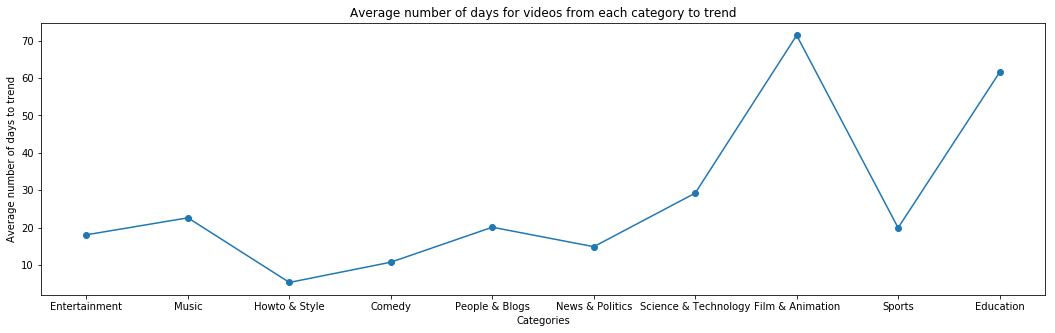

In [45]:
ttt = {}
for i in p:
    ttt[i] = p[i]['time_to_trend'].mean()
    
plt.figure(figsize = (18, 5))
plt.plot(ttt.keys(),ttt.values(), marker = 'o')
plt.xlabel("Categories")
plt.ylabel("Average number of days to trend")
plt.title("Average number of days for videos from each category to trend")

Text(0.5,1,'Average number of days for videos from each category to trend')

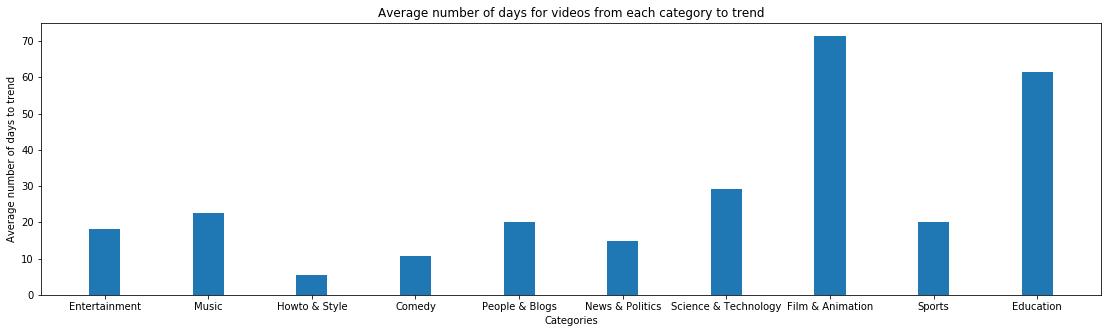

In [36]:
plt.figure(figsize = (19, 5))
plt.bar(ttt.keys(), ttt.values(), 0.3)
plt.xlabel("Categories")
plt.ylabel("Average number of days to trend")
plt.title("Average number of days for videos from each category to trend")

<BarContainer object of 10 artists>

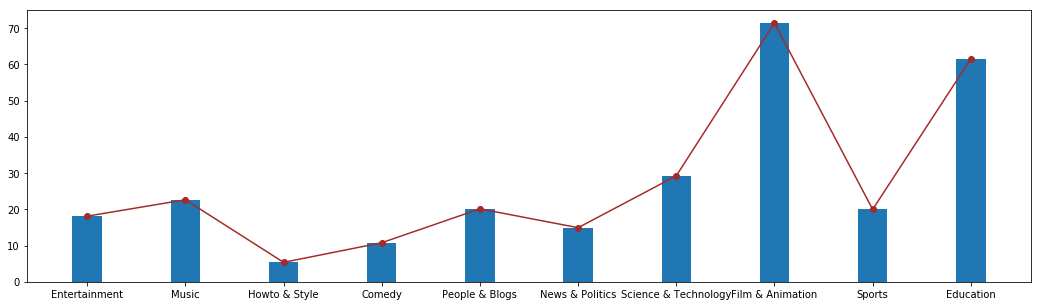

In [8]:
plt.figure(figsize = (18, 5))
plt.plot(ttt.keys(),ttt.values(), color = 'brown', marker = 'o')
plt.bar(ttt.keys(), ttt.values(), 0.3)

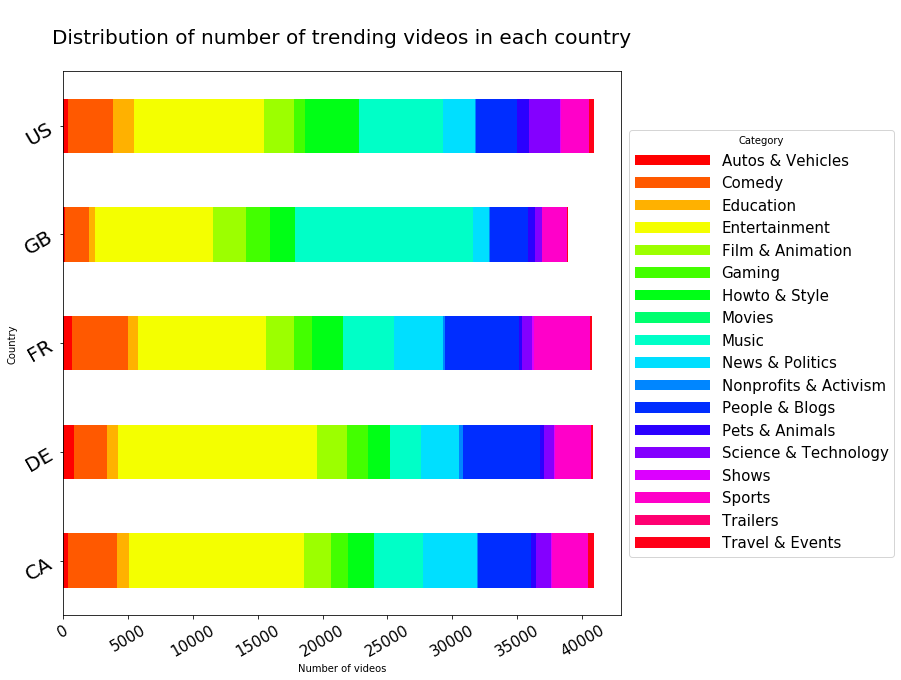

In [9]:
vids.groupby(["country", "Category"]).count()["video_id"].unstack().plot.barh(figsize=(10, 10), stacked=True, cmap = "hsv")
plt.yticks(rotation=30, fontsize=20) 
plt.xticks(rotation=30, fontsize=15)
plt.xlabel("Number of videos")
plt.ylabel("Country")
plt.title("\nDistribution of number of trending videos in each country\n", fontsize=20)
plt.legend(title = "Category", handlelength = 5, fontsize = 15, loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

[Text(0,0,''),
 Text(0,0,'CA'),
 Text(0,0,'DE'),
 Text(0,0,'FR'),
 Text(0,0,'GB'),
 Text(0,0,'US')]

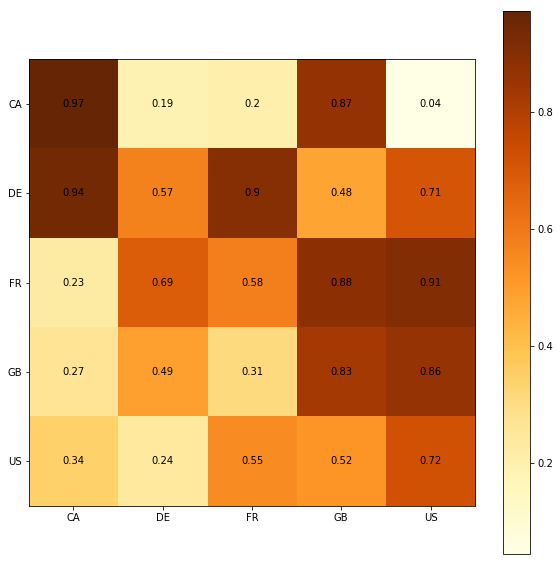

In [10]:
X = np.random.uniform(0, 1, (5, 5))
fig, ax = plt.subplots(figsize = (10, 10))
hmap = ax.imshow(X, cmap = 'YlOrBr', interpolation = 'nearest')
labs = ['']
countries = ['CA', 'DE', 'FR', 'GB', 'US']
cbar = fig.colorbar(hmap)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        text = ax.text(j, i, round(X[i, j], 2), ha = "center", va = "center", color = "black")
for i in countries:
    labs.append(i)
ax.set_yticklabels(labs)
ax.set_xticklabels(labs)

In [11]:
vids_GB = vids[vids['country'] == 'GB']
vids_GB = vids_GB[vids_GB['Category'] == 'Music']
a = vids_GB.groupby("tags").count()["video_id"]
tag = {}
for i in a.keys():
    for j in " ".join(i.split('|')).split(" "):
        j = j.lower()
        j = j.replace('"', '')
        if j in tag:
            tag[j] += 1
        else:
            tag[j] = 1
tag_sorted = sorted(tag.items(), key=operator.itemgetter(1), reverse = True)

In [12]:
a = {x[0]:x[1] for x in tag_sorted}
wc = WordCloud(background_color = "white", max_words = 70, prefer_horizontal = 1).generate_from_frequencies(a)

(-0.5, 399.5, 199.5, -0.5)

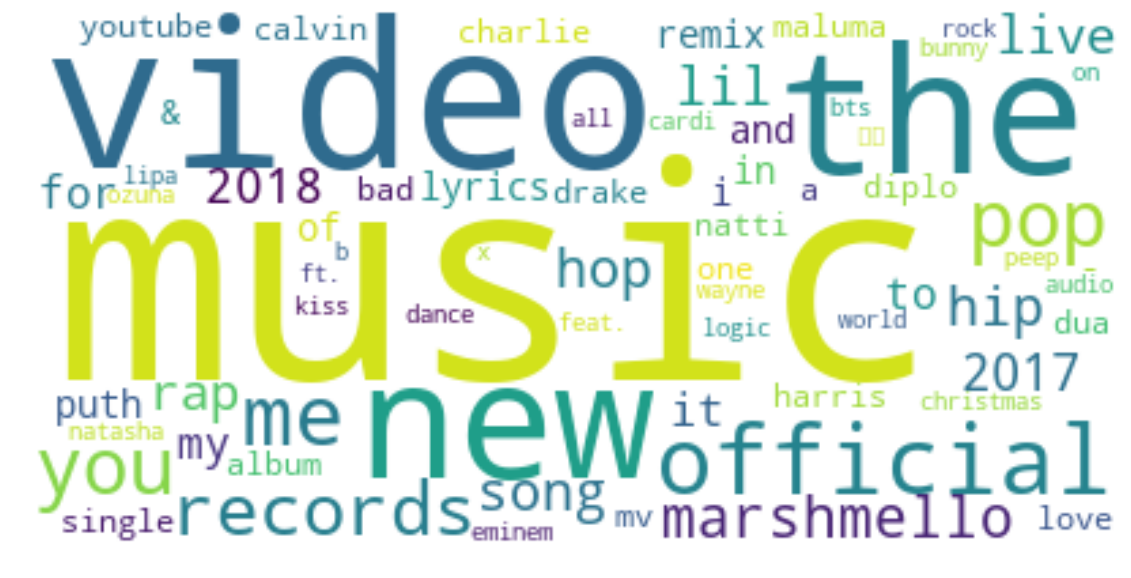

In [13]:
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [14]:
vids_GB = vids[vids['country'] == 'GB']
vids_GB = vids_GB[vids_GB['Category'] == 'Music']
a = vids_GB.groupby("channel_title").count()["video_id"]
a = a.to_dict()
tag_sorted = sorted(a.items(), key=operator.itemgetter(1), reverse = True)
tag_sorted = tag_sorted[:50]
tag_sorted

[('SMTOWN', 178),
 ('jypentertainment', 155),
 ('WORLDSTARHIPHOP', 143),
 ('ibighit', 120),
 ('HOT 97', 119),
 ('Charlie Puth', 114),
 ('EminemVEVO', 114),
 ('JamesBayVEVO', 113),
 ('1theK (원더케이)', 110),
 ('BBC Radio 1', 108),
 ('ChainsmokersVEVO', 108),
 ('MigosVEVO', 108),
 ('SZAVEVO', 107),
 ('Atlantic Records', 103),
 ('GEazyMusicVEVO', 97),
 ('Ty Dolla $ign', 97),
 ('SiaVEVO', 96),
 ('TroyeSivanVEVO', 96),
 ('Marshmello', 90),
 ('Janelle Monáe', 89),
 ('KygoOfficialVEVO', 89),
 ('CJENMMUSIC Official', 88),
 ('Diplo', 88),
 ('HalseyVEVO', 87),
 ('Ozuna', 85),
 ('GraceVanderWaalVEVO', 84),
 ('BBCRadio1VEVO', 83),
 ('SamSmithWorldVEVO', 82),
 ('TWICE JAPAN OFFICIAL YouTube Channel', 82),
 ('Bhad Bhabie', 81),
 ('SuperDuperKyle', 80),
 ('EnriqueIglesiasVEVO', 77),
 ('ChvrchesVEVO', 75),
 ('jbalvinVEVO', 74),
 ('Panic! At The Disco', 73),
 ('Kelly Clarkson', 71),
 ('MalumaVEVO', 69),
 ('DJSnakeVEVO', 68),
 ('TaylorSwiftVEVO', 68),
 ('Fueled By Ramen', 67),
 ('David Guetta', 65),
 ('Roy

(-0.5, 999.5, 499.5, -0.5)

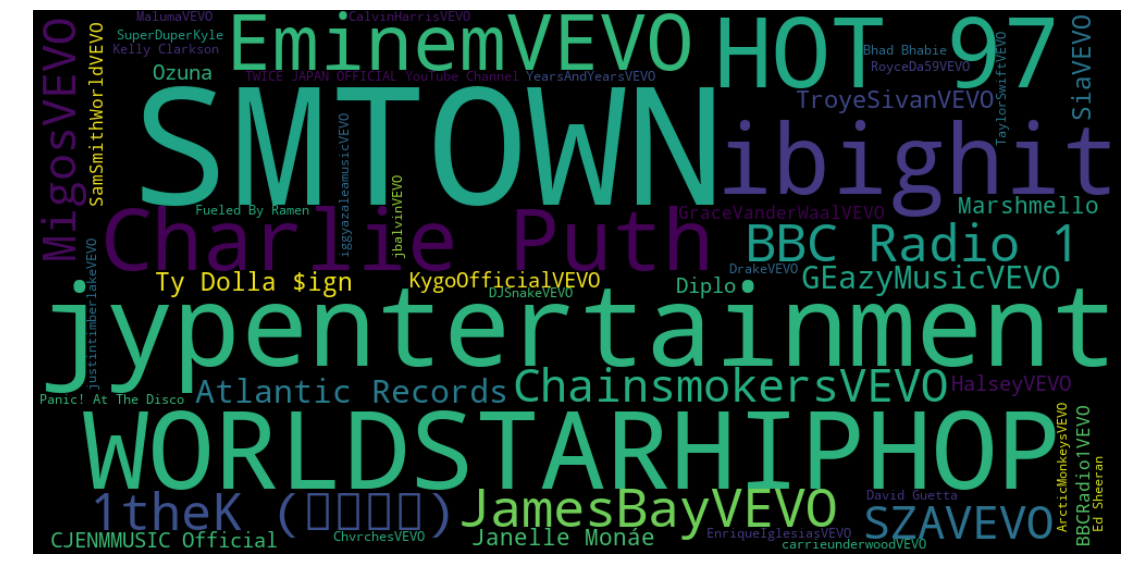

In [16]:
a = {x[0]:x[1] for x in tag_sorted }
wrd_cnt = Counter(a)
wc = WordCloud(width=1000, height=500)
wc.generate_from_frequencies(wrd_cnt)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [37]:
vids_US['trending_month'] = vids_US['trending_date'].str[6:]
vids_dec = vids_US[vids_US['trending_month'] == '12']
a = vids_dec.groupby("tags").count()["video_id"]
tag = {}
for i in a.keys():
    for j in i.split('|'):
        j = j.lower()
        j = j.replace('"', '')
        if j in tag:
            tag[j] += 1
        else:
            tag[j] = 1

tag_sorted = sorted(tag.items(), key=operator.itemgetter(1), reverse = True)

C:\Users\risha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(-0.5, 999.5, 499.5, -0.5)

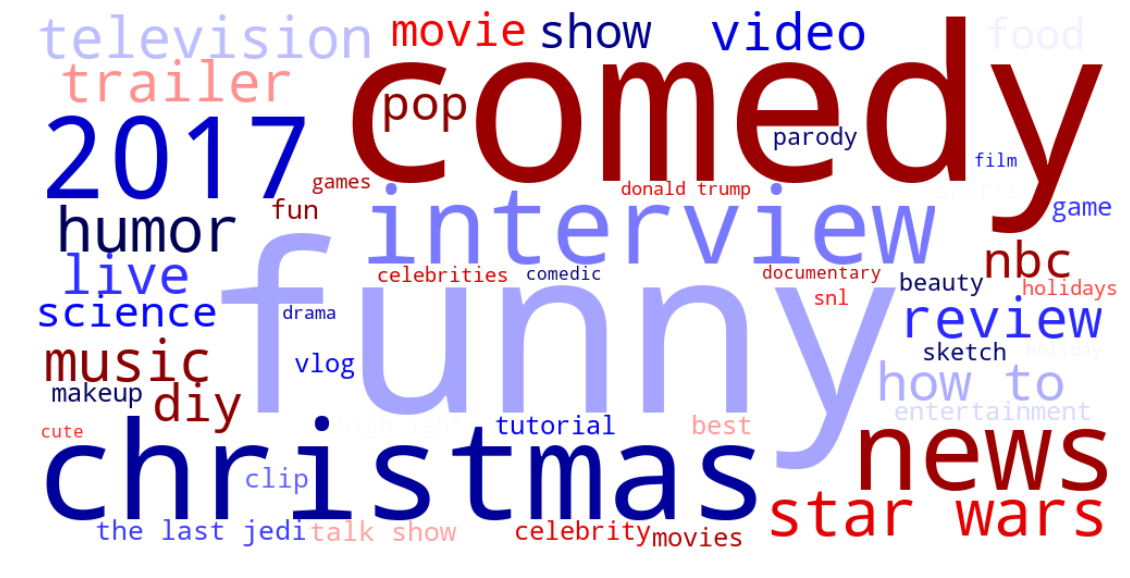

In [43]:
a = {x[0]:x[1] for x in tag_sorted }
wrd_cnt = Counter(a)
wc = WordCloud(width=1000, height=500, max_words = 50, prefer_horizontal = 1, background_color = "white", colormap = "seismic")
wc.generate_from_frequencies(wrd_cnt)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

Text(0.5,1,'Comparison of Usage Frequency of the top 10 Tags')

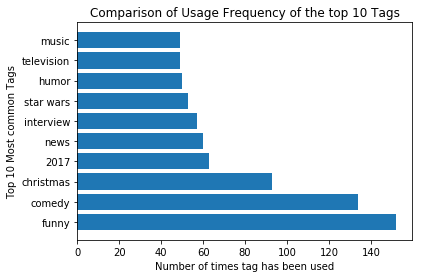

In [44]:
x = []
y = []
len = 0
for i in wrd_cnt:
    x.append(i)
    y.append(wrd_cnt[i])
    len += 1
    if len == 10:
        break
plt.barh(x, y)
plt.xlabel("Number of times tag has been used")
plt.ylabel("Top 10 Most common Tags")
plt.title("Comparison of Usage Frequency of the top 10 Tags")